# Loading and Inspecting Climate Data

This notebook explores historic temperatures for the United States, broken down by month and year, from 1895-2020.

The dataset is available here: [Historical Climate Data](https://www.ncdc.noaa.gov/cag/national/time-series/110/tavg/all/1/1895-2020?base_prd=true&begbaseyear=1901&endbaseyear=2000)

In [1]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [2]:
# Load raw temp data 
atRaw = pd.read_csv('../rawData/tavg-1895-2020.csv')

In [3]:
# Inspect raw temp data
atRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1501 non-null   int64  
 1   Value    1501 non-null   float64
 2   Anomaly  1501 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [4]:
# Let's take a look at the temp data table
atRaw.head()

,Date,Value,Anomaly
0,189501,26.69,-3.43
1,189502,26.60,-7.22
2,189503,39.97,-1.53
3,189504,52.90,1.85
4,189505,59.94,-0.26


In [5]:
atRaw.tail()

,Date,Value,Anomaly
1496,201909,68.43,3.57
1497,201910,52.05,-2.06
1498,201911,41.11,-0.58
1499,201912,36.43,3.75
1500,202001,35.53,5.41


## Data Cleaning

Since the Date series has the Year and Month concatenated. I would like to separate the two and create a new series for each.

In [6]:
# Inspect data types

atRaw.dtypes

Date         int64
Value      float64
Anomaly    float64
dtype: object

In [7]:
# Convert Date series to string in order to separate Year and Month

strDate = atRaw.Date.astype(str)

strDate

0       189501
1       189502
2       189503
3       189504
4       189505
         ...  
1496    201909
1497    201910
1498    201911
1499    201912
1500    202001
Name: Date, Length: 1501, dtype: object

In [8]:
# Write a loop to separate each year and month from the Date series

# Create empty arrays to hold the years and months once separated
month = []
year = []

# Loop through the Date series, pull out the year and month, convert to integer, then send to appropriate array
for i in strDate:
    year.append(int(i[0:4]))
    month.append(int(i[4:6]))

In [9]:
# Verify the loop worked

year

[1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,

In [10]:
# Verify the loop worked

month

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,

In [11]:
# Create a new series for Year, and a new series for Month

atRaw['Year'], atRaw['Month'] = (year, month)

atRaw

,Date,Value,Anomaly,Year,Month
0,189501,26.69,-3.43,1895,1
1,189502,26.60,-7.22,1895,2
2,189503,39.97,-1.53,1895,3
3,189504,52.90,1.85,1895,4
4,189505,59.94,-0.26,1895,5
...,...,...,...,...,...
1496,201909,68.43,3.57,2019,9
1497,201910,52.05,-2.06,2019,10
1498,201911,41.11,-0.58,2019,11
1499,201912,36.43,3.75,2019,12


In [12]:
# Now let's shorten the dataset to the last century weather data

# pull records for 1919 to present
weather = atRaw[atRaw.Year >= 1919]

# drop the single record for January 2020
centWeather = weather[weather.Year < 2020]

centWeather.tail()

,Date,Value,Anomaly,Year,Month
1495,201908,73.74,1.64,2019,8
1496,201909,68.43,3.57,2019,9
1497,201910,52.05,-2.06,2019,10
1498,201911,41.11,-0.58,2019,11
1499,201912,36.43,3.75,2019,12


In [49]:
# Creating subsets for each month
jan = centWeather[centWeather.Month == 1]

feb = centWeather[centWeather.Month == 2] 

mar = centWeather[centWeather.Month == 3]

apr = centWeather[centWeather.Month == 4]

may = centWeather[centWeather.Month == 5]

jun = centWeather[centWeather.Month == 6]

jul = centWeather[centWeather.Month == 7]

aug = centWeather[centWeather.Month == 8]

sep = centWeather[centWeather.Month == 9]

octb = centWeather[centWeather.Month == 10]

nov = centWeather[centWeather.Month == 11]

dec = centWeather[centWeather.Month == 12]

In [53]:
feb

(Empty DataFrame
 Columns: [Date, Value, Anomaly, Year, Month]
 Index: [],)

## Visualizing Temperature Trends

Now that the data is in a format we can work with, let's make some neat charts!

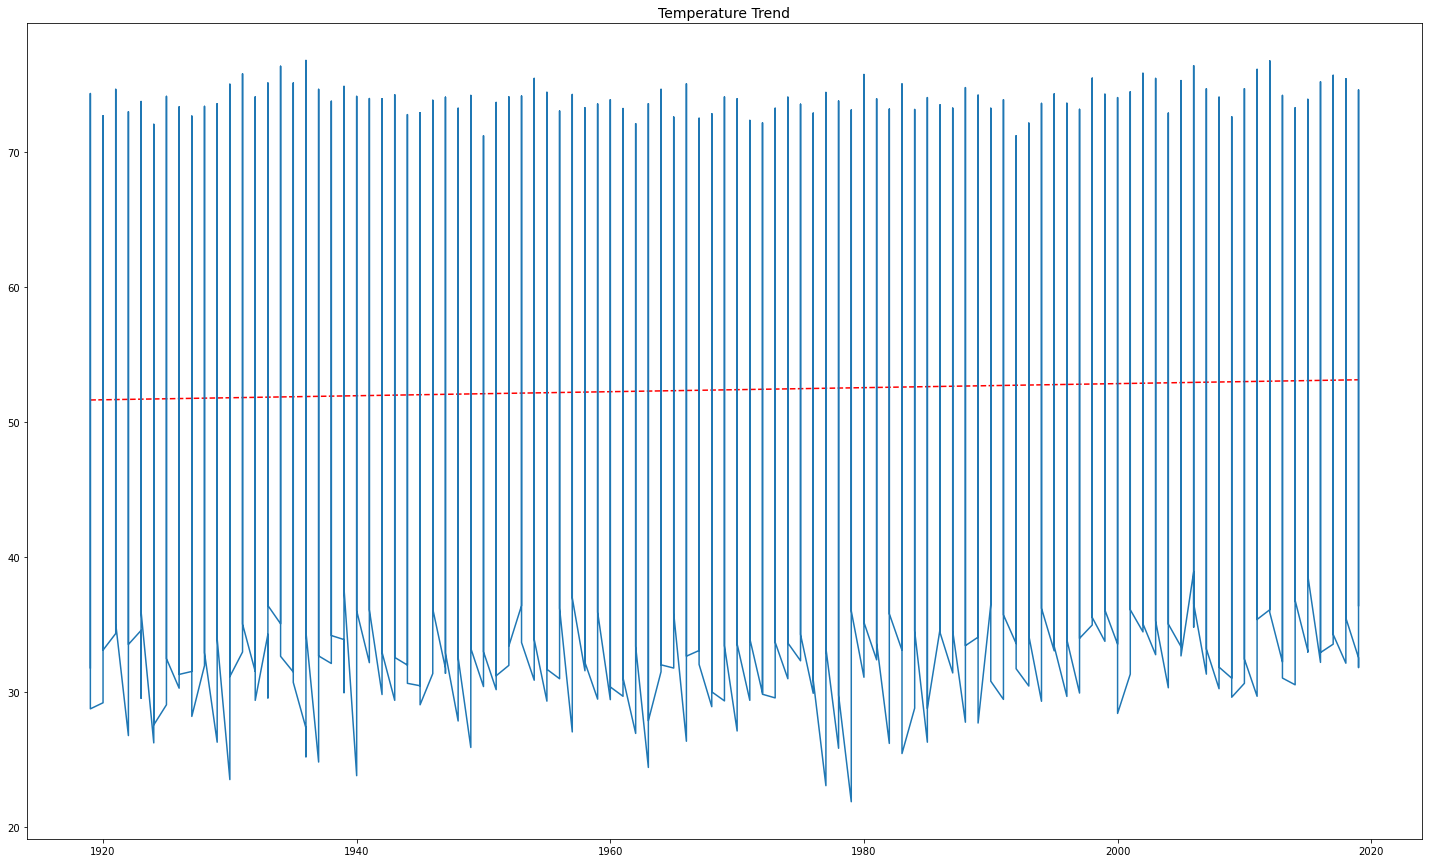

In [66]:
year = centWeather.Year
value = centWeather.Value
anomaly = centWeather.Anomaly

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(year, value, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, value)
ax.set_title('Temperature Trend', fontsize=14);

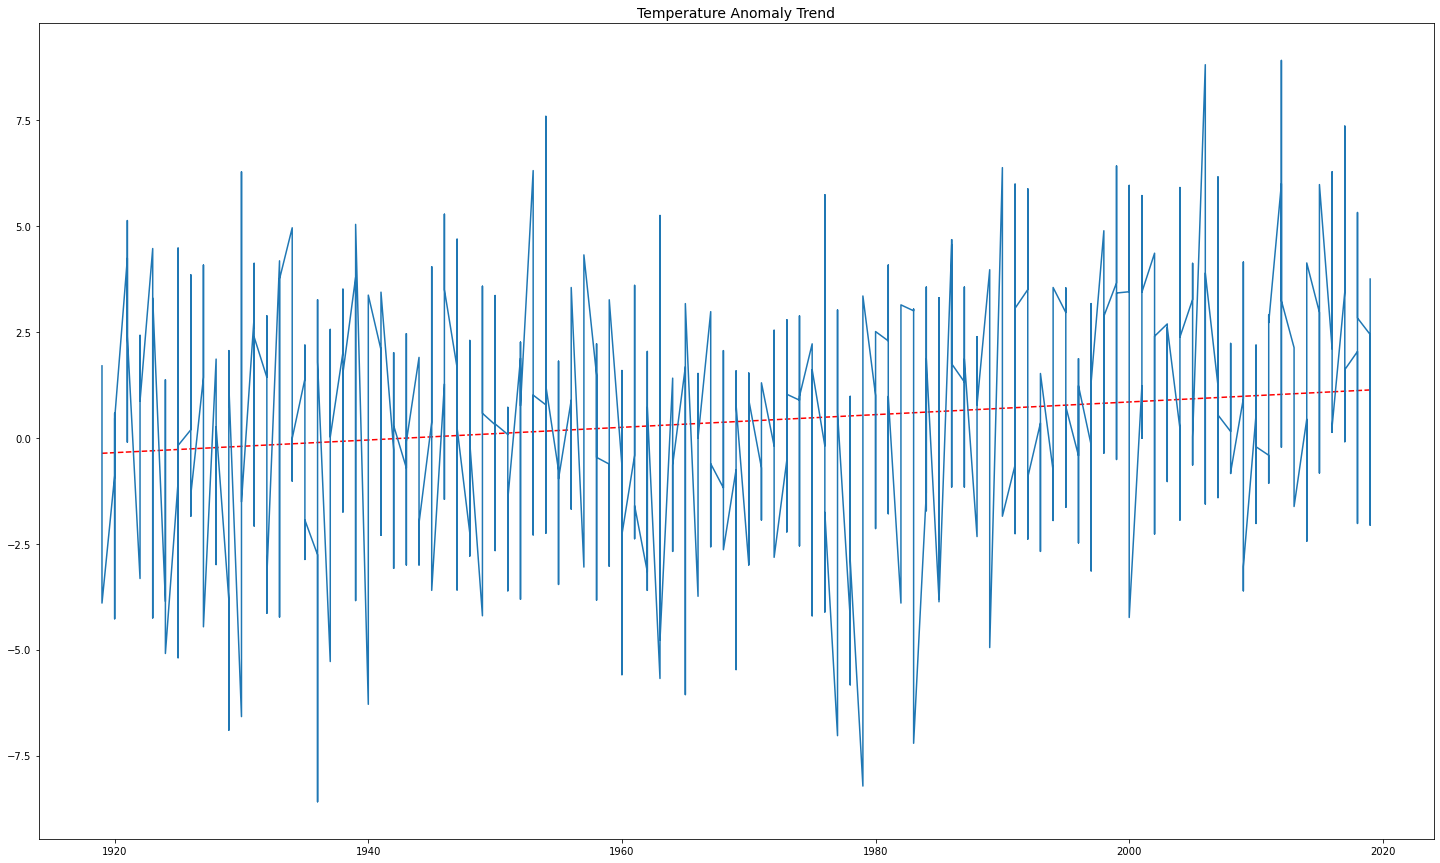

In [67]:
# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(year, anomaly, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, anomaly)
ax.set_title('Temperature Anomaly Trend', fontsize=14);

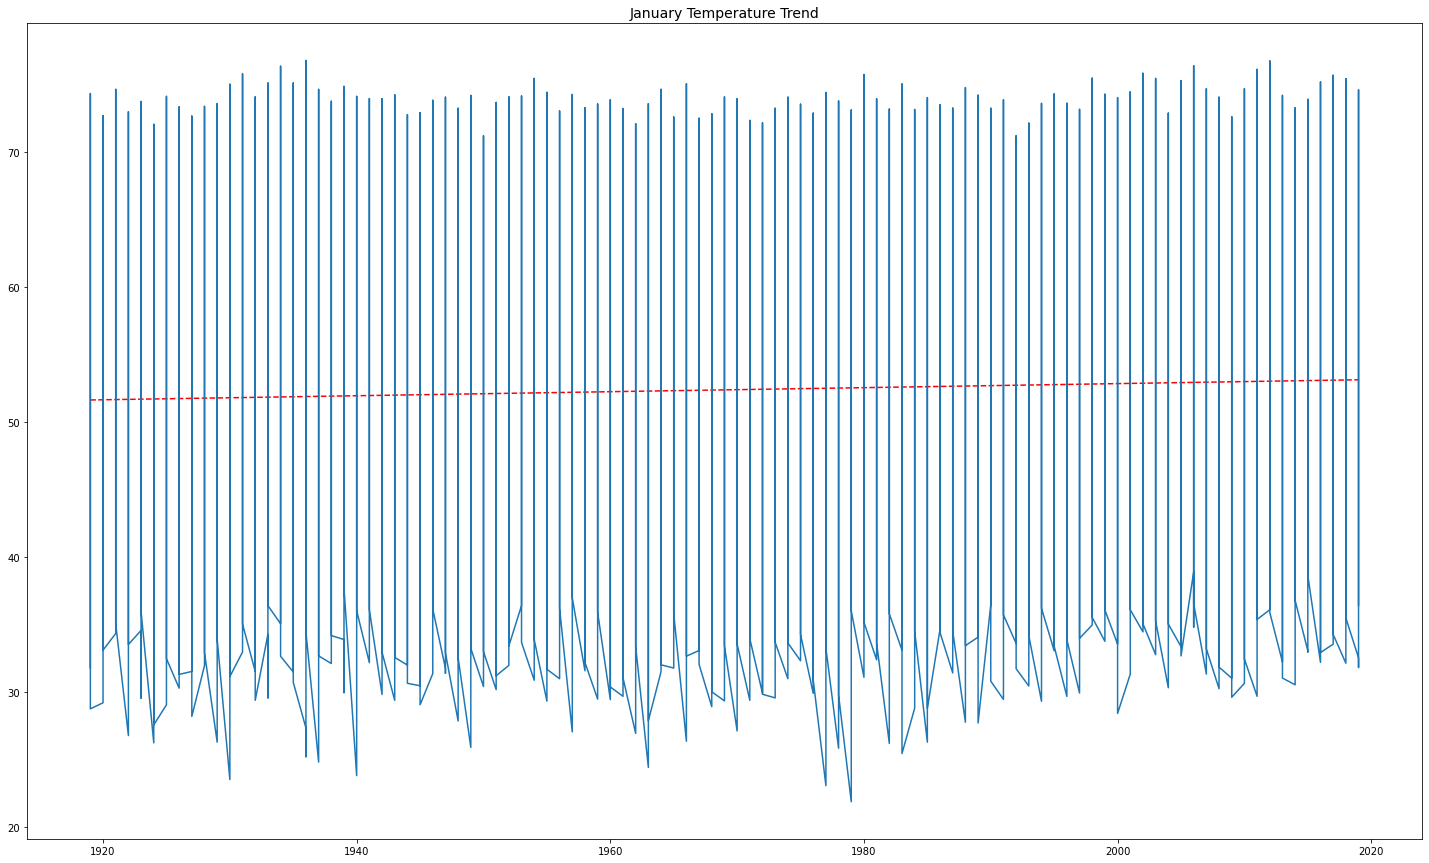

In [22]:
# Plotting January Temperature Trends 

janTemp = jan.Value
janYear = jan.Year

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(janYear, janTemp, 1)
p = np.poly1d(z)
ax.plot(janYear,p(janYear),"r--")
ax.plot(janYear, janTemp)
ax.set_title('January Temperature Trend', fontsize=14);

TypeError: expected non-empty vector for x

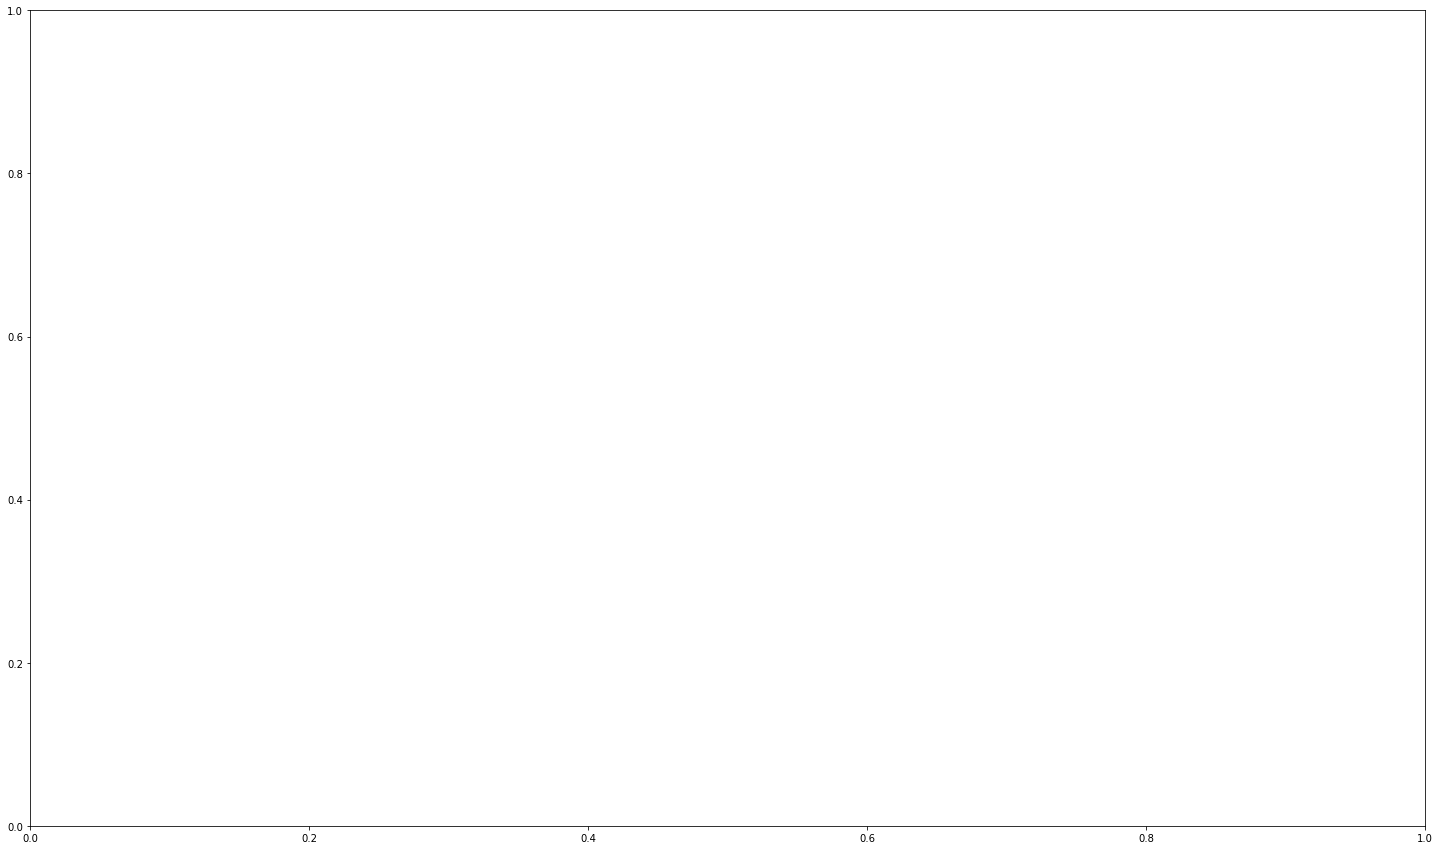

In [23]:
# Plotting February Temperature Trends 

febTemp = feb.Value
febYear = feb.Year

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(febYear, febTemp, 1)
p = np.poly1d(z)
ax.plot(febYear,p(febYear),"r--")
ax.plot(febYear, febTemp)
ax.set_title('February Temperature Trend', fontsize=14);

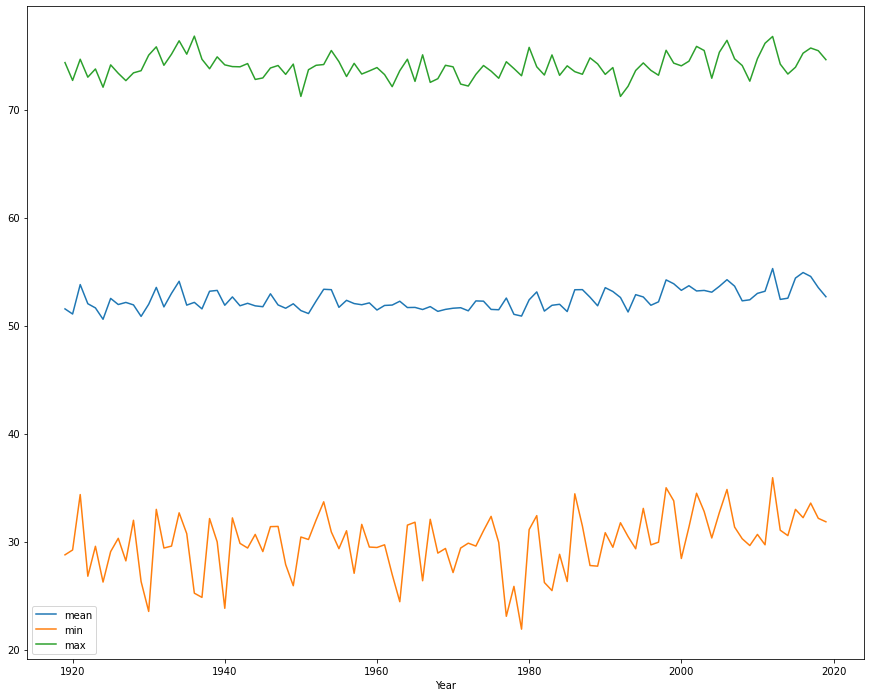

In [68]:
yearVal = centWeather.groupby('Year').Value.agg(['mean', 'min', 'max'])

yearVal.plot();